In [27]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [28]:
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_f1.csv'

pathToF1Ttraining = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_training_f1.csv'

In [29]:
training_dt_f1 = pd.read_csv(pathToF1Ttraining, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)

In [30]:
medium = 0.4
good = 0.85
step = 11

In [31]:
#training_dt_f1 = training_dt_f1.sort_values(by='value', ascending=True)
#test_dt_f1 = test_dt_f1.sort_values(by='value', ascending=True)

In [32]:
intervalBadTraining = training_dt_f1[(training_dt_f1['value'] <= medium) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTraining = list(intervalBadTraining['key'])
listBadAttributesTraining.remove('learning_rate_605')
listBadAttributesTrainingPerformance = list(intervalBadTraining['value'])

intervalMediumTraining = training_dt_f1[(training_dt_f1['value'] > medium) & (training_dt_f1['value'] <= good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTraining = list(intervalMediumTraining['key'])
listMediumAttributesTrainingPerformance = list(intervalMediumTraining['value'])


intervalGoodTraining = training_dt_f1[(training_dt_f1['value'] > good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTraining = list(intervalGoodTraining['key'])
listGoodAttributesTrainingPerformance = list(intervalGoodTraining['value'])

In [33]:
def plotAttributes(listAttr, ds, listPerformance, tittle):
    for attribute in listAttr:
        valuesX = list(ds[ds['key'] == attribute]['value'])
        valuesY = list(ds[ds['key'] == attribute]['step'])
        plt.plot(valuesY, valuesX)
    
    classes = []
    for attrib, performance in zip(listAttr, listPerformance):
        classes.append( attrib + " - {:.2f}".format(performance))

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

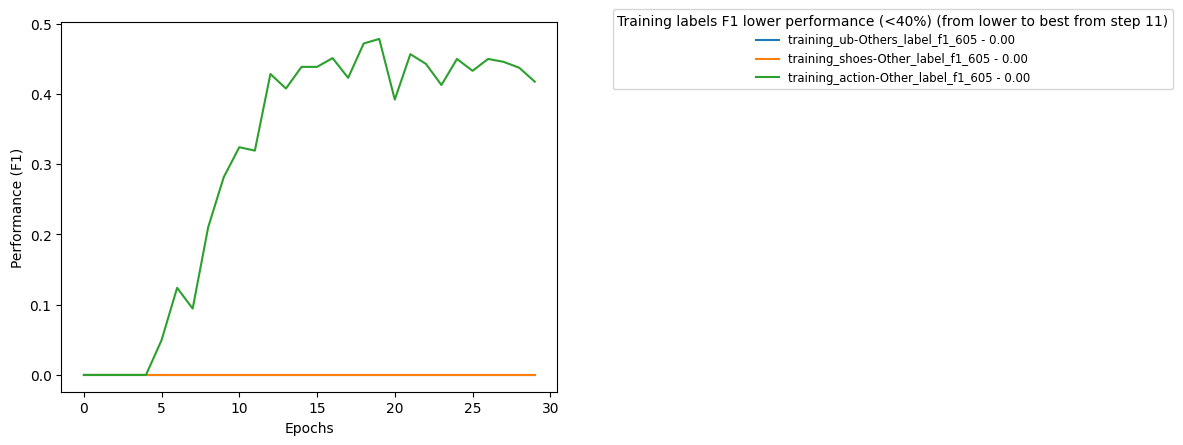

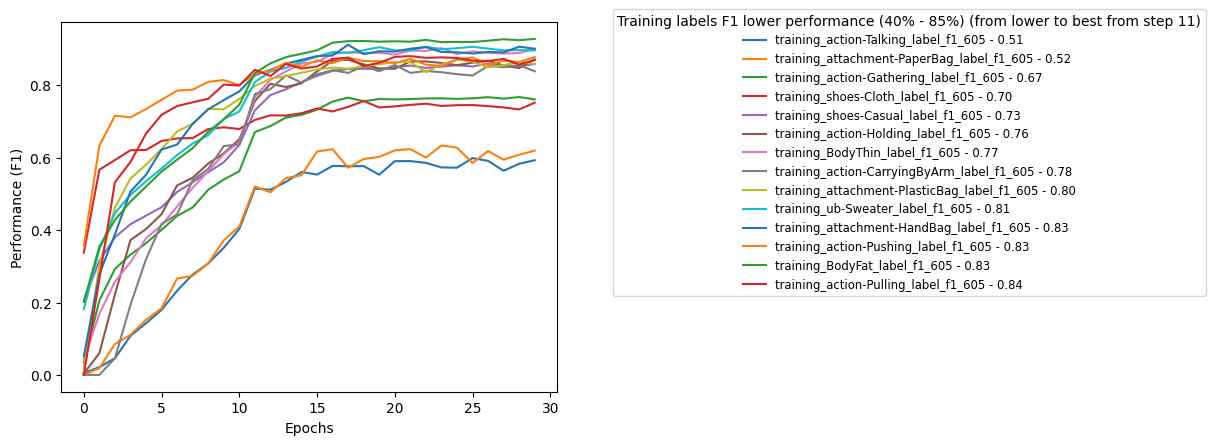

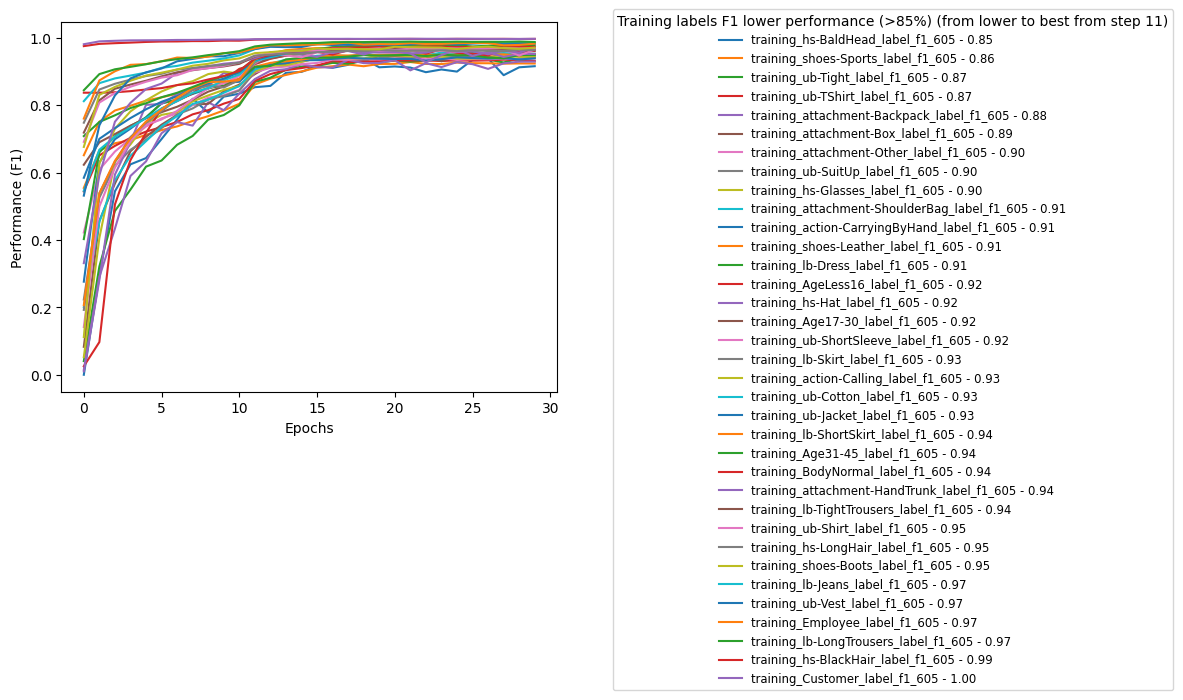

In [34]:
plotAttributes(listBadAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTraining, training_dt_f1, listMediumAttributesTrainingPerformance, "Training labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTraining, training_dt_f1, listGoodAttributesTrainingPerformance, "Training labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [35]:
intervalBadTesting = test_dt_f1[(test_dt_f1['value'] <= medium) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTesting = list(intervalBadTesting['key'])
listBadAttributesTesting.remove('learning_rate_605')
listBadAttributesTestingPerformance = list(intervalBadTesting['value'])

intervalMediumTesting = test_dt_f1[(test_dt_f1['value'] > medium) & (test_dt_f1['value'] <= good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTesting = list(intervalMediumTesting['key'])
listMediumAttributesTestingPerformance = list(intervalMediumTesting['value'])

intervalGoodTesting = test_dt_f1[(test_dt_f1['value'] > good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTesting = list(intervalGoodTesting['key'])
listGoodAttributesTestingPerformance = list(intervalGoodTesting['value'])

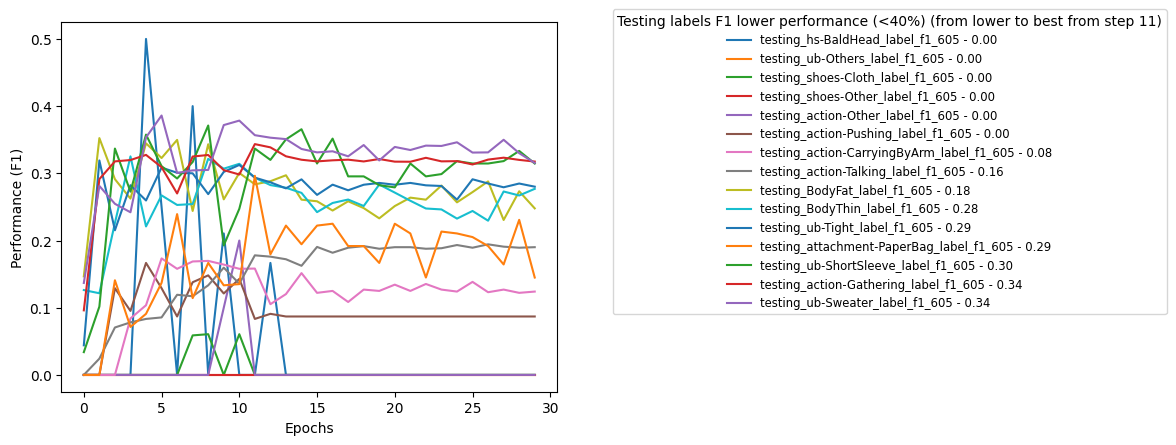

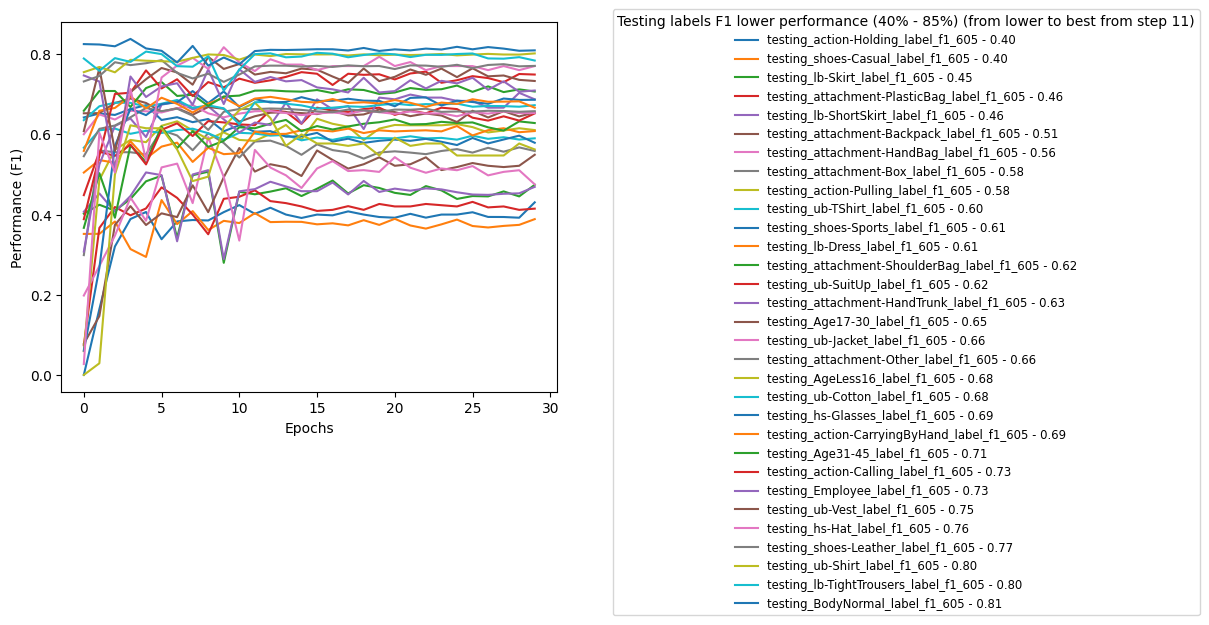

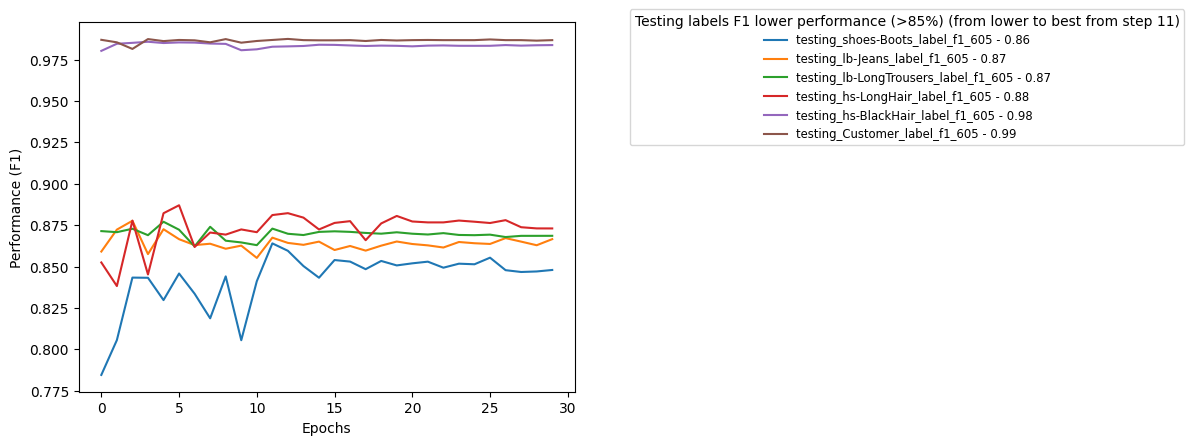

In [36]:
plotAttributes(listBadAttributesTesting, test_dt_f1, listBadAttributesTestingPerformance, "Testing labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTesting, test_dt_f1, listMediumAttributesTestingPerformance, "Testing labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTesting, test_dt_f1, listGoodAttributesTestingPerformance, "Testing labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [37]:
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

In [38]:
tablaBadTesting = pd.DataFrame()
listBadAttributesTestingPerformance.remove(listBadAttributesTestingPerformance[0])
tablaBadTesting['attributes'] = listBadAttributesTesting
tablaBadTesting['performance'] = listBadAttributesTestingPerformance
tablaMediumTesting = pd.DataFrame()
tablaMediumTesting['attributes'] = listMediumAttributesTesting
tablaMediumTesting['performance'] = listMediumAttributesTestingPerformance
tablaGoodTesting = pd.DataFrame()
tablaGoodTesting['attributes'] = listGoodAttributesTesting
tablaGoodTesting['performance'] = listGoodAttributesTestingPerformance

tablaBadTraining = pd.DataFrame()
listBadAttributesTrainingPerformance.remove(listBadAttributesTrainingPerformance[0])
tablaBadTraining['attributes'] = listBadAttributesTraining
tablaBadTraining['performance'] = listBadAttributesTrainingPerformance

tablaMediumTraining = pd.DataFrame()
tablaMediumTraining['attributes'] = listMediumAttributesTraining
tablaMediumTraining['performance'] = listMediumAttributesTrainingPerformance

tablaGoodTraining = pd.DataFrame()
tablaGoodTraining['attributes'] = listGoodAttributesTraining
tablaGoodTraining['performance'] = listGoodAttributesTrainingPerformance

listPerfoTraining=[]
listPerfoTesting=[]
for attributeReal in listAttributesRAPzs:
    
    for attributeTraining in listBadAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listBadAttributesTrainingPerformance[listBadAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listMediumAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listMediumAttributesTrainingPerformance[listMediumAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listGoodAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listGoodAttributesTrainingPerformance[listGoodAttributesTraining.index(attributeTraining)]

    for attributeTesting in listBadAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listBadAttributesTestingPerformance[listBadAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listMediumAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listMediumAttributesTestingPerformance[listMediumAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listGoodAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listGoodAttributesTestingPerformance[listGoodAttributesTesting.index(attributeTesting)]
    
    listPerfoTraining.append(perfoTraining)
    listPerfoTesting.append(perfoTesting)



tablaAll = pd.DataFrame({'attribute': listAttributesRAPzs,
     'perfo training (F1)': listPerfoTraining,
     'perfo testing (F1)': listPerfoTesting
    })

In [39]:
tablaBadTraining

,attributes,performance
0,training_ub-Others_label_f1_605,0.000000
1,training_shoes-Other_label_f1_605,0.000010
2,training_action-Other_label_f1_605,0.319444


In [40]:
tablaBadTesting

,attributes,performance
0,testing_hs-BaldHead_label_f1_605,0.000000
1,testing_ub-Others_label_f1_605,0.000000
2,testing_shoes-Cloth_label_f1_605,0.000000
3,testing_shoes-Other_label_f1_605,0.000000
4,testing_action-Other_label_f1_605,0.000010
5,testing_action-Pushing_label_f1_605,0.083333
6,testing_action-CarryingByArm_label_f1_605,0.158273
7,testing_action-Talking_label_f1_605,0.177966
8,testing_BodyFat_label_f1_605,0.283630
9,testing_BodyThin_label_f1_605,0.293465


In [41]:
tablaMediumTraining

,attributes,performance
0,training_action-Talking_label_f1_605,0.514571
1,training_attachment-PaperBag_label_f1_605,0.520468
2,training_action-Gathering_label_f1_605,0.670702
3,training_shoes-Cloth_label_f1_605,0.704358
4,training_shoes-Casual_label_f1_605,0.730764
5,training_action-Holding_label_f1_605,0.756335
6,training_BodyThin_label_f1_605,0.767143
7,training_action-CarryingByArm_label_f1_605,0.775956
8,training_attachment-PlasticBag_label_f1_605,0.797988
9,training_ub-Sweater_label_f1_605,0.808785


In [42]:
tablaMediumTesting

,attributes,performance
0,testing_action-Holding_label_f1_605,0.401914
1,testing_shoes-Casual_label_f1_605,0.403587
2,testing_lb-Skirt_label_f1_605,0.450593
3,testing_attachment-PlasticBag_label_f1_605,0.460526
4,testing_lb-ShortSkirt_label_f1_605,0.463415
5,testing_attachment-Backpack_label_f1_605,0.507246
6,testing_attachment-HandBag_label_f1_605,0.561265
7,testing_attachment-Box_label_f1_605,0.582210
8,testing_action-Pulling_label_f1_605,0.583851
9,testing_ub-TShirt_label_f1_605,0.602230


In [43]:
tablaGoodTraining

,attributes,performance
0,training_hs-BaldHead_label_f1_605,0.853211
1,training_shoes-Sports_label_f1_605,0.861091
2,training_ub-Tight_label_f1_605,0.868864
3,training_ub-TShirt_label_f1_605,0.871859
4,training_attachment-Backpack_label_f1_605,0.877419
5,training_attachment-Box_label_f1_605,0.892060
6,training_attachment-Other_label_f1_605,0.897094
7,training_ub-SuitUp_label_f1_605,0.899242
8,training_hs-Glasses_label_f1_605,0.900175
9,training_attachment-ShoulderBag_label_f1_605,0.905692


In [44]:
tablaGoodTesting

,attributes,performance
0,testing_shoes-Boots_label_f1_605,0.863978
1,testing_lb-Jeans_label_f1_605,0.867430
2,testing_lb-LongTrousers_label_f1_605,0.872900
3,testing_hs-LongHair_label_f1_605,0.881090
4,testing_hs-BlackHair_label_f1_605,0.982764
5,testing_Customer_label_f1_605,0.986850


In [45]:
import pickle
import easydict

fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)

maxAttributes = len(listAttributesRAPzs)
listTrainingCount = dataset.label[dataset.partition.train][:,:maxAttributes].sum(axis=0).tolist()
listTestingCount = dataset.label[dataset.partition.test][:,:maxAttributes].sum(axis=0).tolist()

In [46]:
tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount

In [47]:
tablaAll.sort_values(by='perfo testing (F1)')

,attribute,perfo training (F1),perfo testing (F1),training count,testing count
0,hs-BaldHead,0.853211,0.000000,105,6
24,shoes-Cloth,0.704358,0.000000,239,25
14,ub-Others,0.000000,0.000000,32,6
26,shoes-Other,0.000010,0.000000,7,2
53,action-Other,0.319444,0.000010,99,16
49,action-Pushing,0.831655,0.083333,231,18
51,action-CarryingByArm,0.775956,0.158273,382,89
46,action-Talking,0.514571,0.177966,552,155
40,BodyFat,0.833797,0.283630,2703,766
42,BodyThin,0.767143,0.293465,1690,488
